In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Load the dataset
df = pd.read_csv("movies_dataset.csv")  # Ensure the filename matches

In [4]:
# Display basic information
print("Dataset Info:")
df.info()

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7000 entries, 0 to 6999
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Movie_Title         7000 non-null   object 
 1   Genre               7000 non-null   object 
 2   Year                7000 non-null   int64  
 3   Budget_Million      7000 non-null   int64  
 4   Box_Office_Million  7000 non-null   int64  
 5   IMDb_Rating         7000 non-null   float64
 6   Director            7000 non-null   object 
 7   Main_Actor          7000 non-null   object 
 8   Runtime_Minutes     7000 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 492.3+ KB


In [5]:
# Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())


Missing Values:
Movie_Title           0
Genre                 0
Year                  0
Budget_Million        0
Box_Office_Million    0
IMDb_Rating           0
Director              0
Main_Actor            0
Runtime_Minutes       0
dtype: int64


In [6]:
# Drop duplicates
df = df.drop_duplicates()

In [8]:
print(df.columns)

Index(['Movie_Title', 'Genre', 'Year', 'Budget_Million', 'Box_Office_Million',
       'IMDb_Rating', 'Director', 'Main_Actor', 'Runtime_Minutes'],
      dtype='object')


In [ ]:
# Convert data types if necessary
df['Year'] = pd.to_numeric(df['Year'], errors='coerce')
df['Budget_Million'] = pd.to_numeric(df['Budget_Million'], errors='coerce')
df['Box_Office_Million'] = pd.to_numeric(df['Box_Office_Million'], errors='coerce')
df = df.dropna(subset=['Year', 'Budget_Million', 'Box_Office_Million'])

In [12]:
# Remove rows with NaN values
df['Year'] = df['Year'].astype(int)

In [13]:
# Summary statistics
print("\nSummary Statistics:")
print(df.describe())


Summary Statistics:
              Year  Budget_Million  Box_Office_Million  IMDb_Rating  \
count  7000.000000     7000.000000         7000.000000  7000.000000   
mean   2001.723143      149.076857          503.901143     6.482714   
std      12.781129       86.775537          288.728517     1.732379   
min    1980.000000        1.000000            5.000000     3.500000   
25%    1991.000000       74.000000          256.000000     5.000000   
50%    2002.000000      149.000000          500.000000     6.500000   
75%    2013.000000      224.000000          757.000000     8.000000   
max    2023.000000      299.000000          999.000000     9.500000   

       Runtime_Minutes  
count      7000.000000  
mean        126.834429  
std          30.146314  
min          75.000000  
25%         101.000000  
50%         127.000000  
75%         152.000000  
max         179.000000  


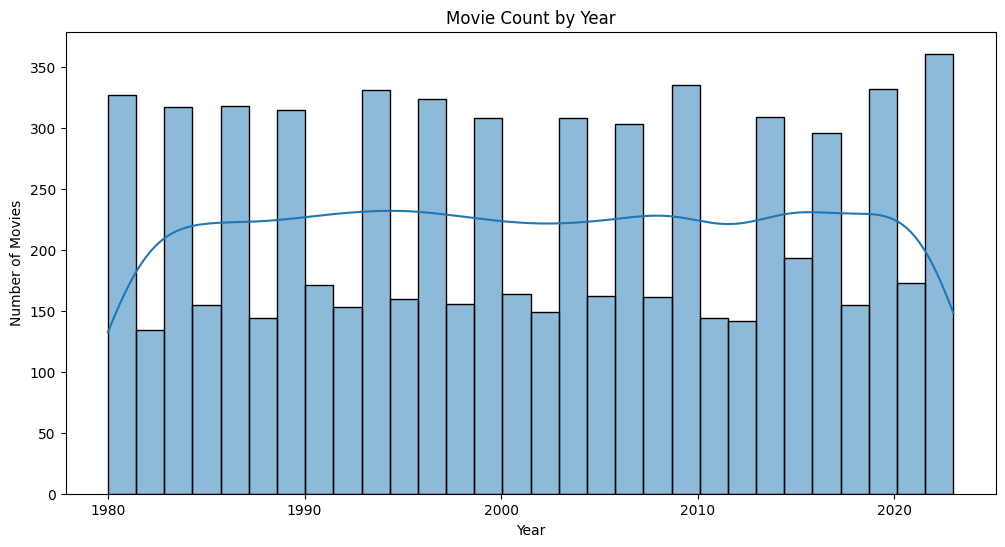

In [15]:
# Visualizing distributions
plt.figure(figsize=(12, 6))
sns.histplot(df['Year'], bins=30, kde=True)
plt.title("Movie Count by Year")
plt.xlabel("Year")
plt.ylabel("Number of Movies")
plt.show()

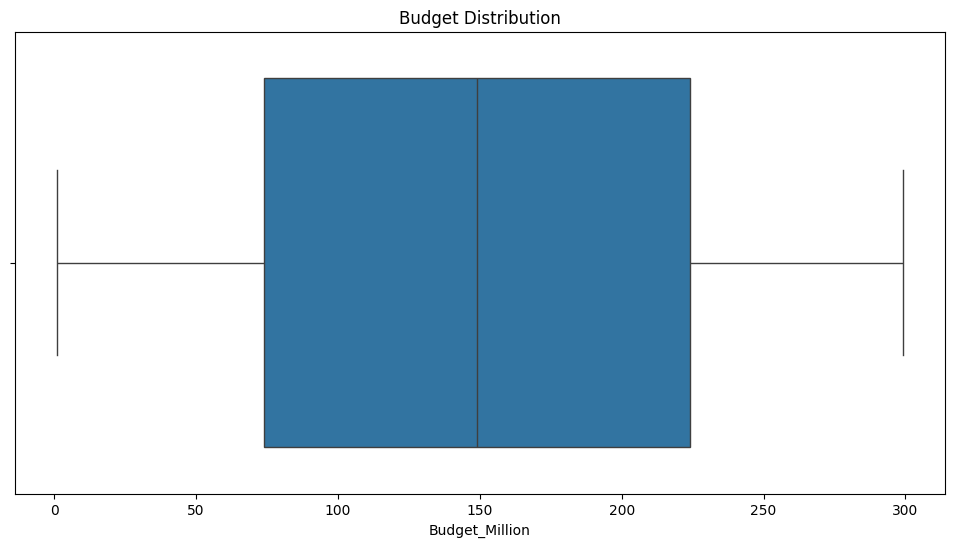

In [16]:
plt.figure(figsize=(12, 6))
sns.boxplot(x=df['Budget_Million'])
plt.title("Budget Distribution")
plt.show()

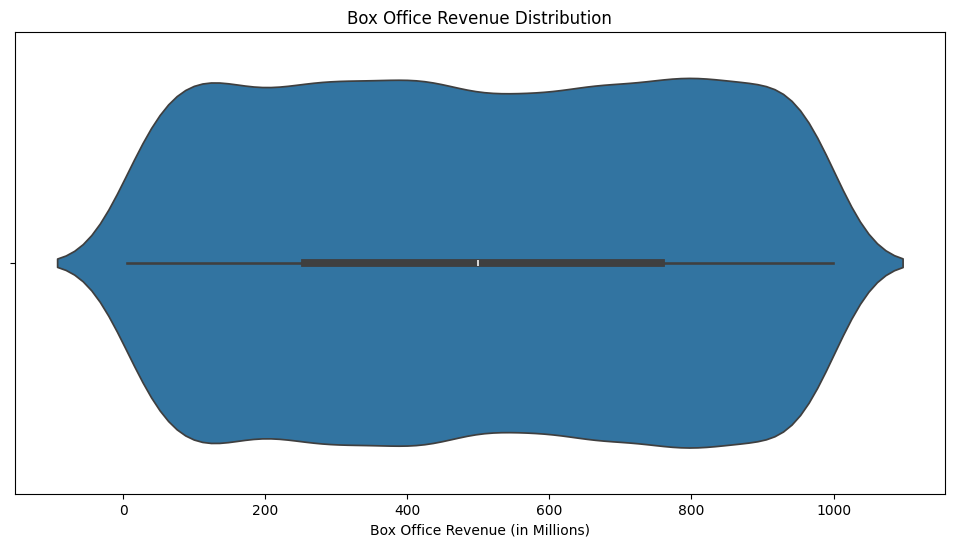

In [22]:
plt.figure(figsize=(12, 6))
sns.violinplot(x=df['Box_Office_Million'])
plt.title("Box Office Revenue Distribution")
plt.xlabel("Box Office Revenue (in Millions)")
plt.show()


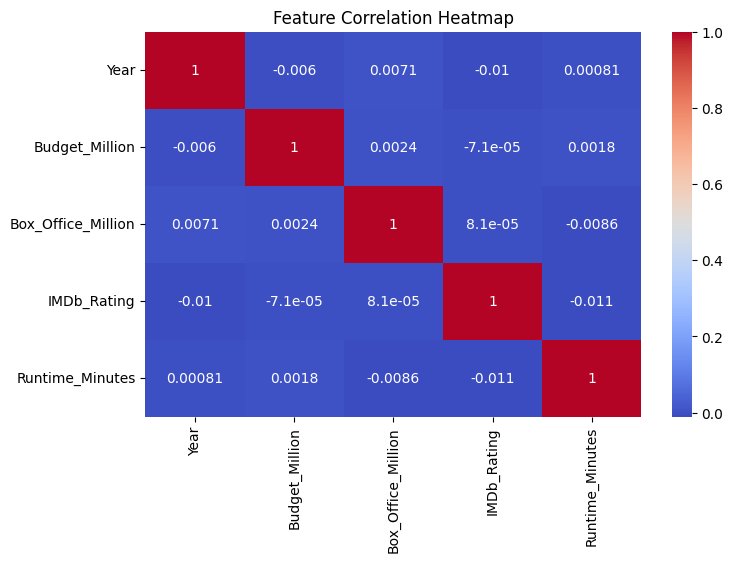

In [20]:
plt.figure(figsize=(8, 5))

# Select only numeric columns
numeric_df = df.select_dtypes(include=['number'])

# Check if there are any numeric columns left
if not numeric_df.empty:
    sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm")
    plt.title("Feature Correlation Heatmap")
    plt.show()
else:
    print("No numeric columns available for correlation.")


In [23]:

print("Data cleaning and exploration completed! ✅")

Data cleaning and exploration completed! ✅


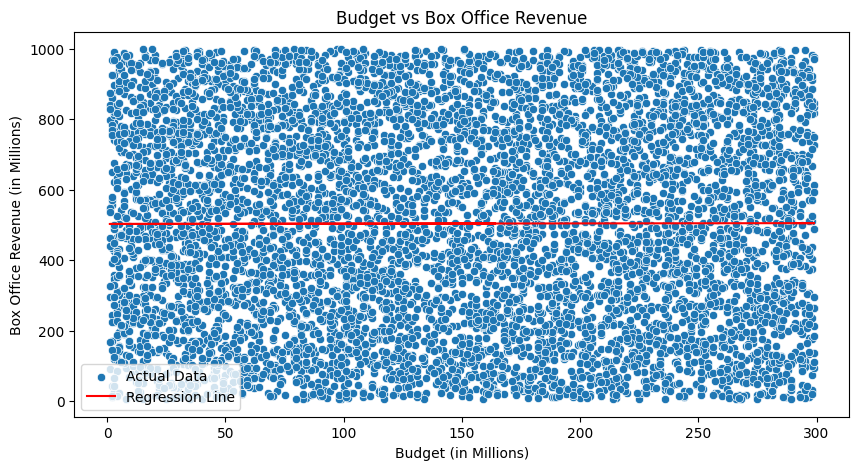

In [24]:
from sklearn.linear_model import LinearRegression

# Prepare data
X = df[['Budget_Million']]  # Independent Variable
y = df['Box_Office_Million']  # Dependent Variable

# Train Model
model = LinearRegression()
model.fit(X, y)

# Predict & Plot
plt.figure(figsize=(10, 5))
sns.scatterplot(x=df['Budget_Million'], y=df['Box_Office_Million'], label="Actual Data")
plt.plot(df['Budget_Million'], model.predict(X), color='red', label="Regression Line")
plt.xlabel("Budget (in Millions)")
plt.ylabel("Box Office Revenue (in Millions)")
plt.title("Budget vs Box Office Revenue")
plt.legend()
plt.show()

In [29]:
print(df.columns)

Index(['Movie_Title', 'Genre', 'Year', 'Budget_Million', 'Box_Office_Million',
       'IMDb_Rating', 'Director', 'Main_Actor', 'Runtime_Minutes'],
      dtype='object')


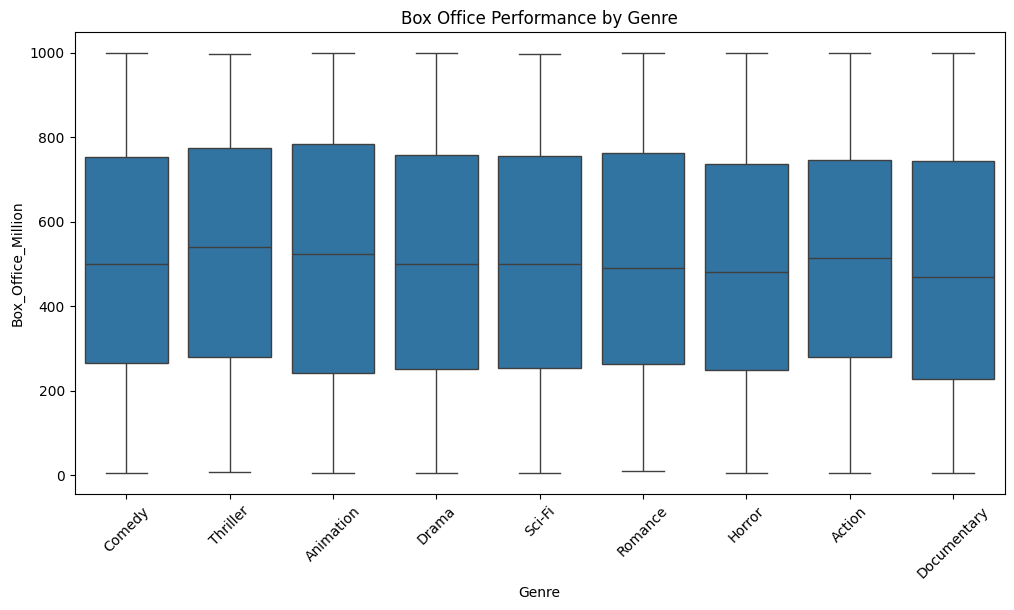

In [32]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x="Genre", y="Box_Office_Million")
plt.title("Box Office Performance by Genre")
plt.xticks(rotation=45)
plt.show()

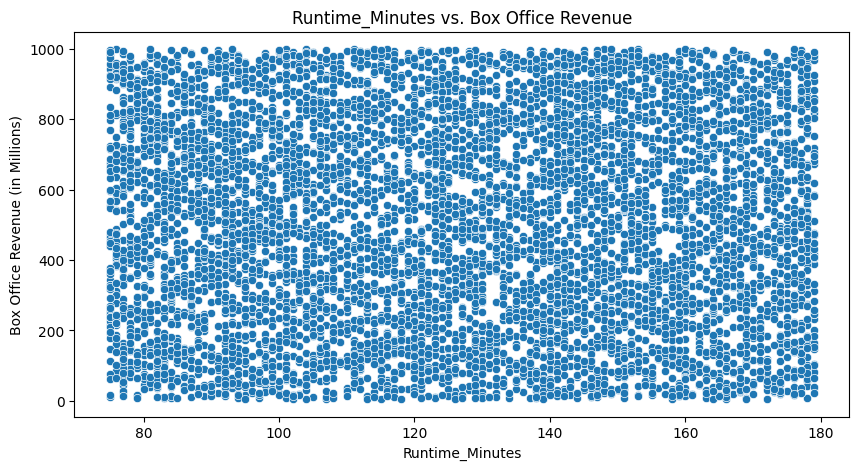

In [38]:
plt.figure(figsize=(10, 5))
sns.scatterplot(data=df, x="Runtime_Minutes", y="Box_Office_Million")
plt.title("Runtime_Minutes vs. Box Office Revenue")
plt.xlabel("Runtime_Minutes")
plt.ylabel("Box Office Revenue (in Millions)")
plt.show()

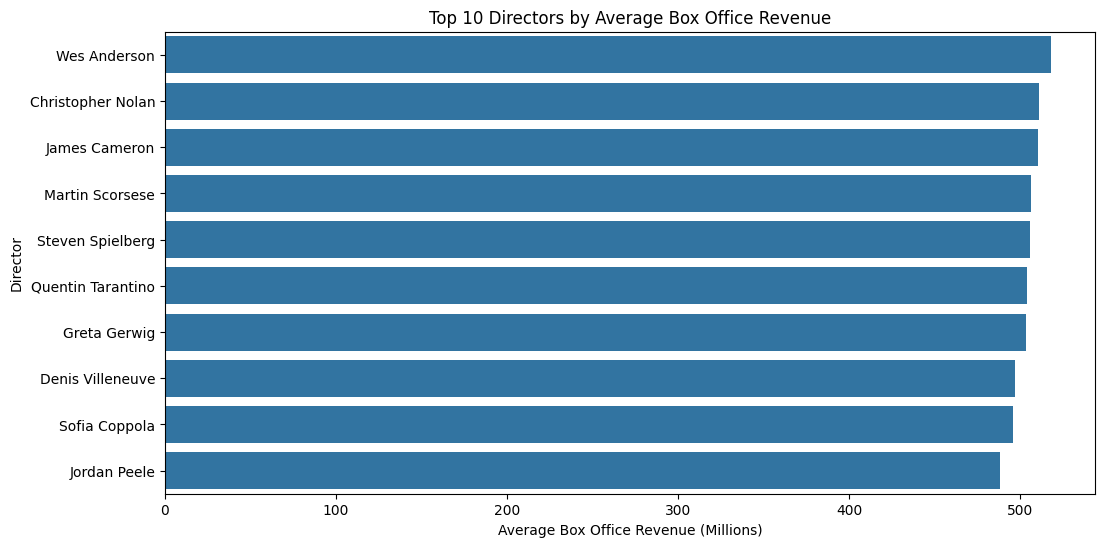

In [39]:
top_directors = df.groupby("Director")["Box_Office_Million"].mean().sort_values(ascending=False).head(10)
plt.figure(figsize=(12, 6))
sns.barplot(x=top_directors.values, y=top_directors.index)
plt.title("Top 10 Directors by Average Box Office Revenue")
plt.xlabel("Average Box Office Revenue (Millions)")
plt.show()